<a href="https://colab.research.google.com/github/lukplamino/DADS7202_HW01_Coupon_Group/blob/main/in_vehicle_coupon_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1 Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
# import os
# import warnings
# import random
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import seaborn as sns
# import sklearn
# import scipy
# import scipy.stats as stats
# #import scikitplot as skplt
# import missingno as msno
# import plotly.graph_objects as go
# %matplotlib inline

# from sklearn import base
# from collections import defaultdict
# from matplotlib.ticker import FixedLocator, FixedFormatter
# from joblib import dump, load
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.utils.fixes import loguniform
# from sklearn.model_selection import train_test_split, GridSearchCV, \
# RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold, KFold
# from sklearn.compose import ColumnTransformer
# from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import GaussianNB, BernoulliNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import LinearSVC, SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.decomposition import PCA, KernelPCA
# from kmodes.kprototypes import KPrototypes
# from sklearn import metrics
# from sklearn.metrics import silhouette_samples, silhouette_score'''

### Step 2 Import the dataset



In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/lukplamino/DADS7202_HW01_Coupon_Group/main/in-vehicle-coupon-recommendation.csv')

### Step 3 Exploratory Data Analysis(EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [30]:
#Check for missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

print()

df.isna().sum()

destination - 0%
passanger - 0%
weather - 0%
temperature - 0%
time - 0%
coupon - 0%
expiration - 0%
gender - 0%
age - 0%
maritalStatus - 0%
has_children - 0%
education - 0%
occupation - 0%
income - 0%
car - 99%
Bar - 1%
CoffeeHouse - 2%
CarryAway - 1%
RestaurantLessThan20 - 1%
Restaurant20To50 - 1%
toCoupon_GEQ5min - 0%
toCoupon_GEQ15min - 0%
toCoupon_GEQ25min - 0%
direction_same - 0%
direction_opp - 0%
Y - 0%



destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

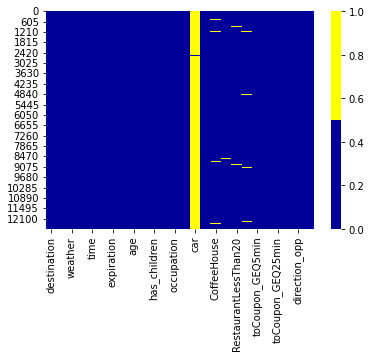

In [25]:
cols = df.columns
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [23]:
print(df.car.unique())

[nan 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D']


### There are missing data in 6 columns
#### 1.  Car column
 - 99% of Car column is missing data and the existing data in car column is not clean, consequence; we will drop this column off.
 
#### 2. Others Columns [Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50]
 - There are missing data only 1-2%, so we drop some rows with null data off.

In [36]:
clean_df = df.copy()
#Drop Car column
clean_df.drop(['car'], axis=1, inplace=True)
#Drop null rows
clean_df.dropna(inplace=True)
print(f'Original Dataframe Shape: {df.shape}')
print(f'Cleaned Dataframe Shape: {clean_df.shape}')
print(f'Droped data only {((df.shape[0]-clean_df.shape[0])/df.shape[0]*100):.2f}%')

Original Dataframe Shape: (12684, 26)
Cleaned Dataframe Shape: (12079, 25)
Droped data only 4.77%


In [28]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [6]:
df.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [8]:
df.nunique(axis=0)

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64

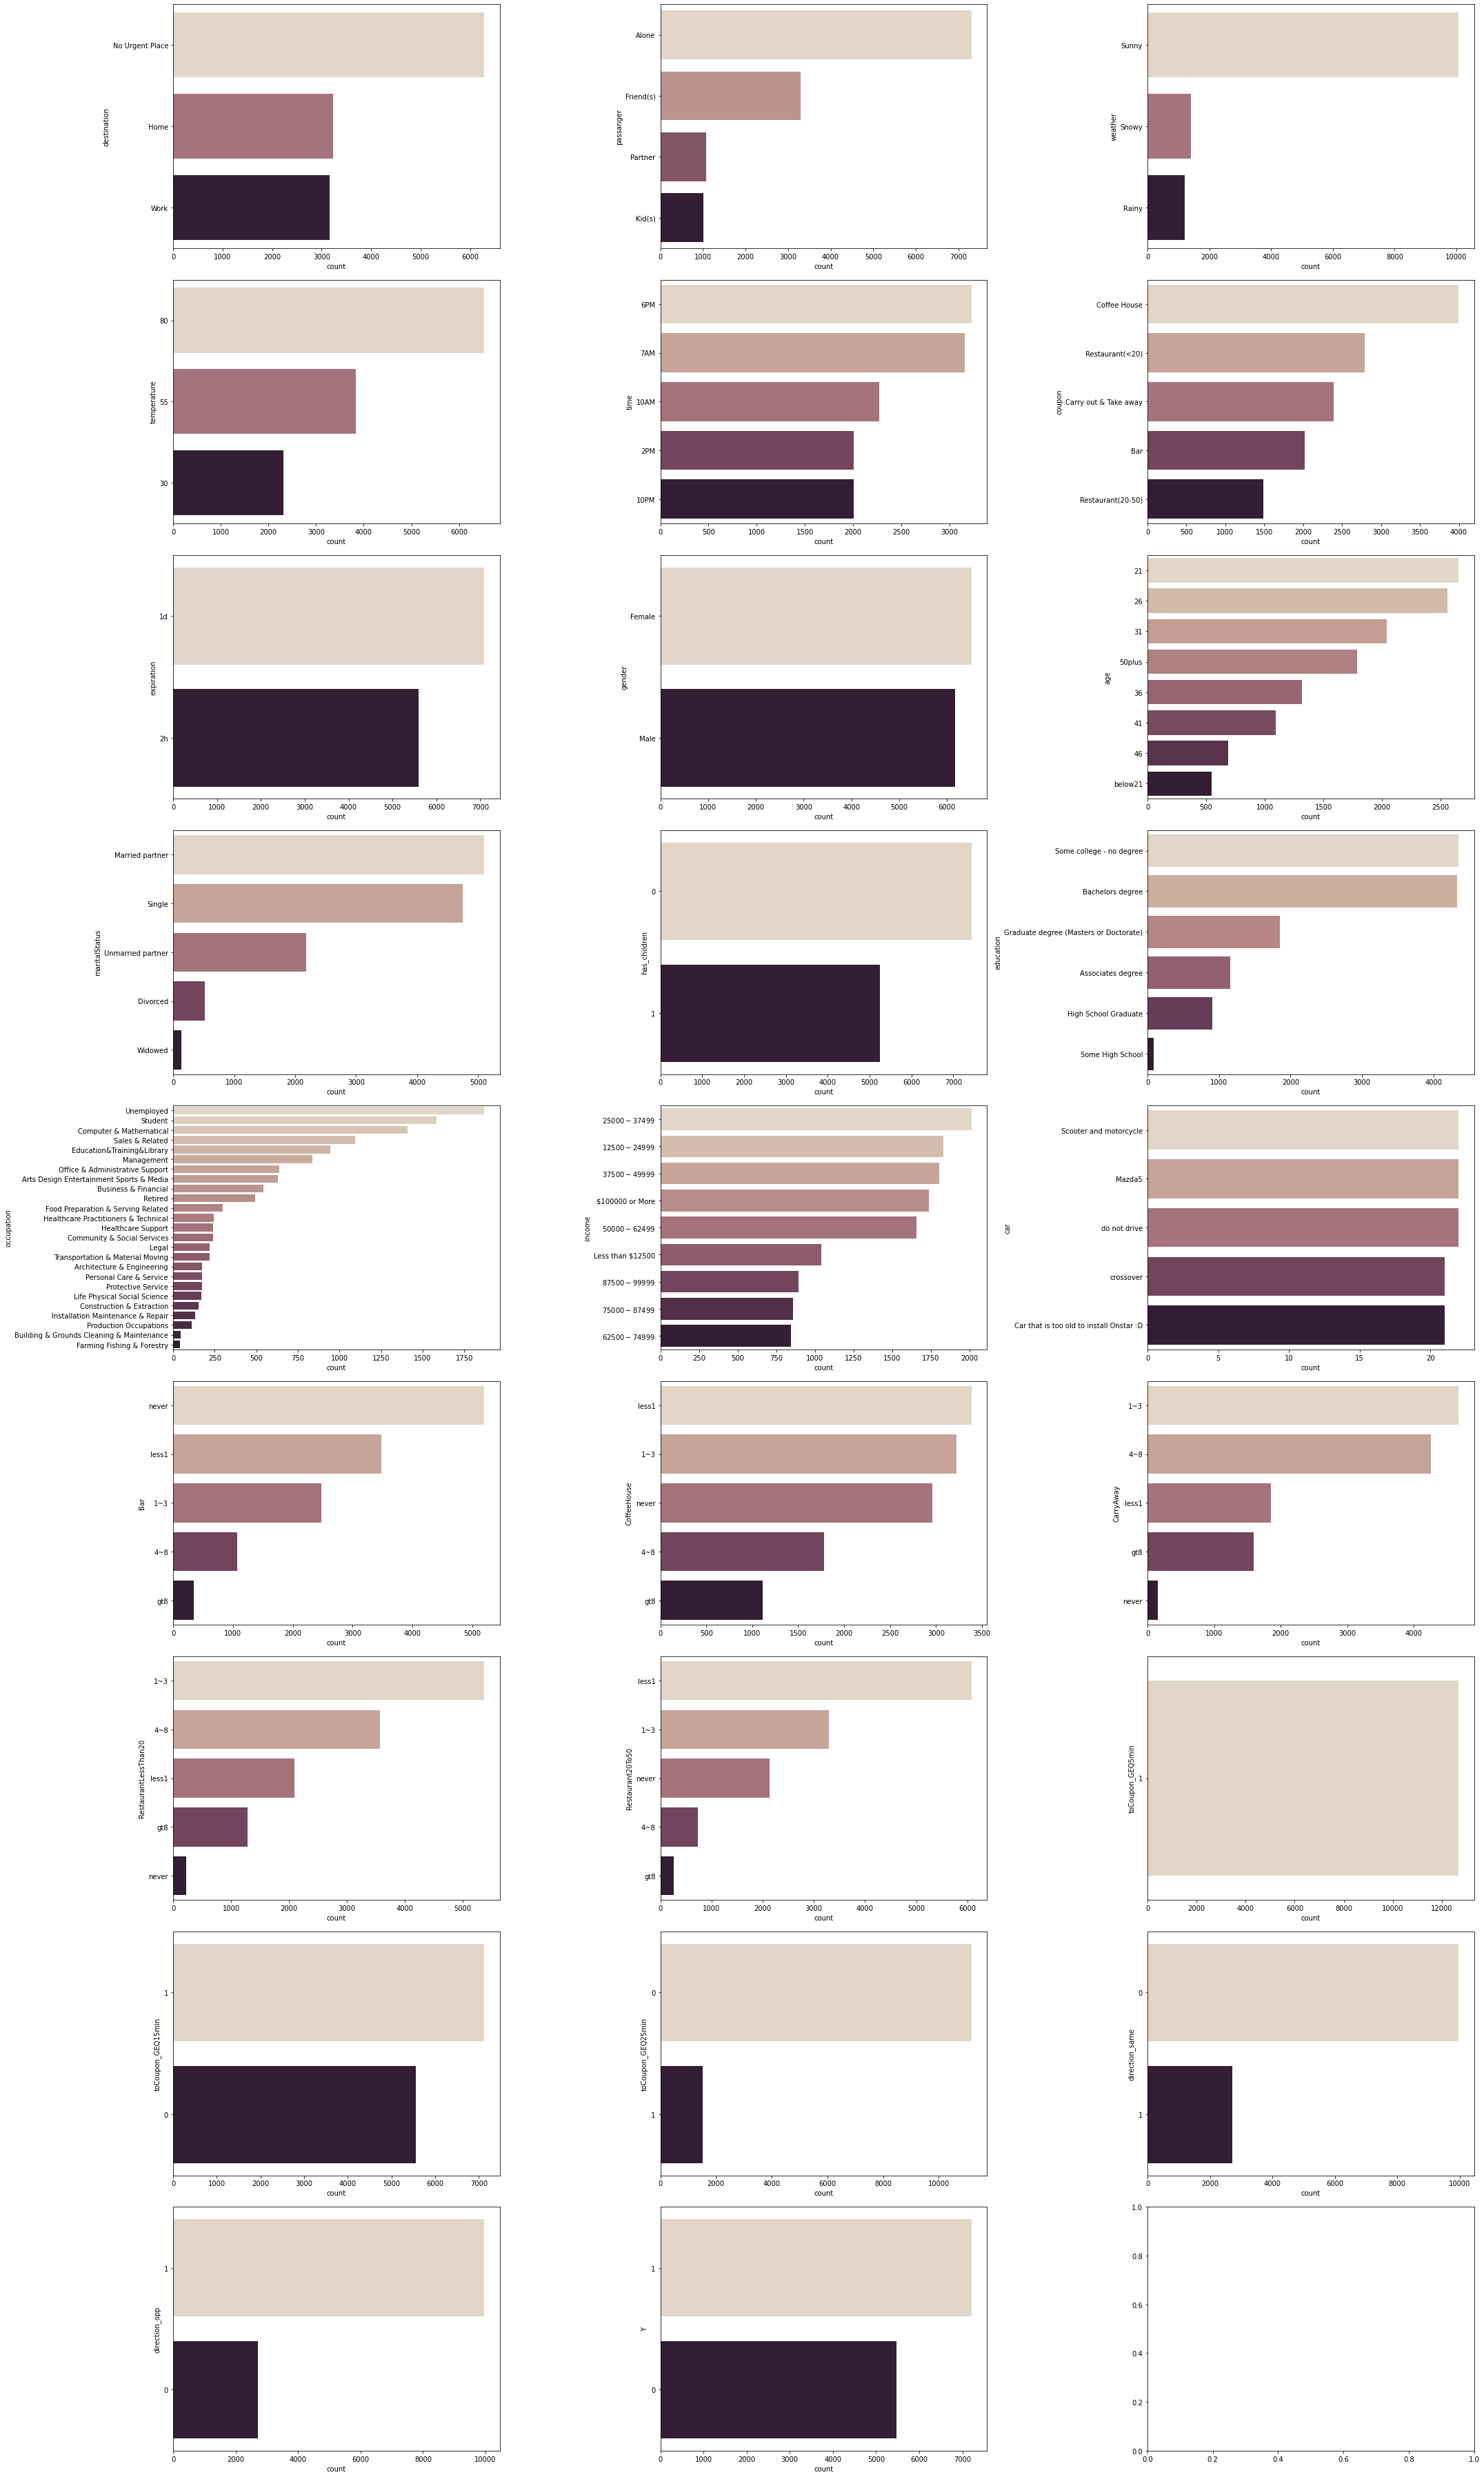

In [22]:
clean_df = df.copy()
fig, axes = plt.subplots(9, 3, figsize=(30,50))
axes = axes.flatten()
for ax, col in zip(axes, clean_df.columns):
    sns.countplot(y=col, data=clean_df, ax=ax, 
                  palette="ch:.25", order=clean_df[col].value_counts().index);
plt.tight_layout()
plt.show()


Drop Col with imbalance data (Threshold >= 80%)

In [ ]:
clean_df.drop(['car','toCoupon_GEQ5min','toCoupon_GEQ25min','direction_opp'], axis=1, inplace=True)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [ ]:
for col in clean_df.columns:
    pct_missing = np.mean(clean_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

destination - 0%
passanger - 0%
weather - 0%
temperature - 0%
time - 0%
coupon - 0%
expiration - 0%
gender - 0%
age - 0%
maritalStatus - 0%
has_children - 0%
education - 0%
occupation - 0%
income - 0%
Bar - 1%
CoffeeHouse - 2%
CarryAway - 1%
RestaurantLessThan20 - 1%
Restaurant20To50 - 1%
toCoupon_GEQ15min - 0%
direction_same - 0%
Y - 0%


In [ ]:
clean_df.dropna(inplace=True)

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

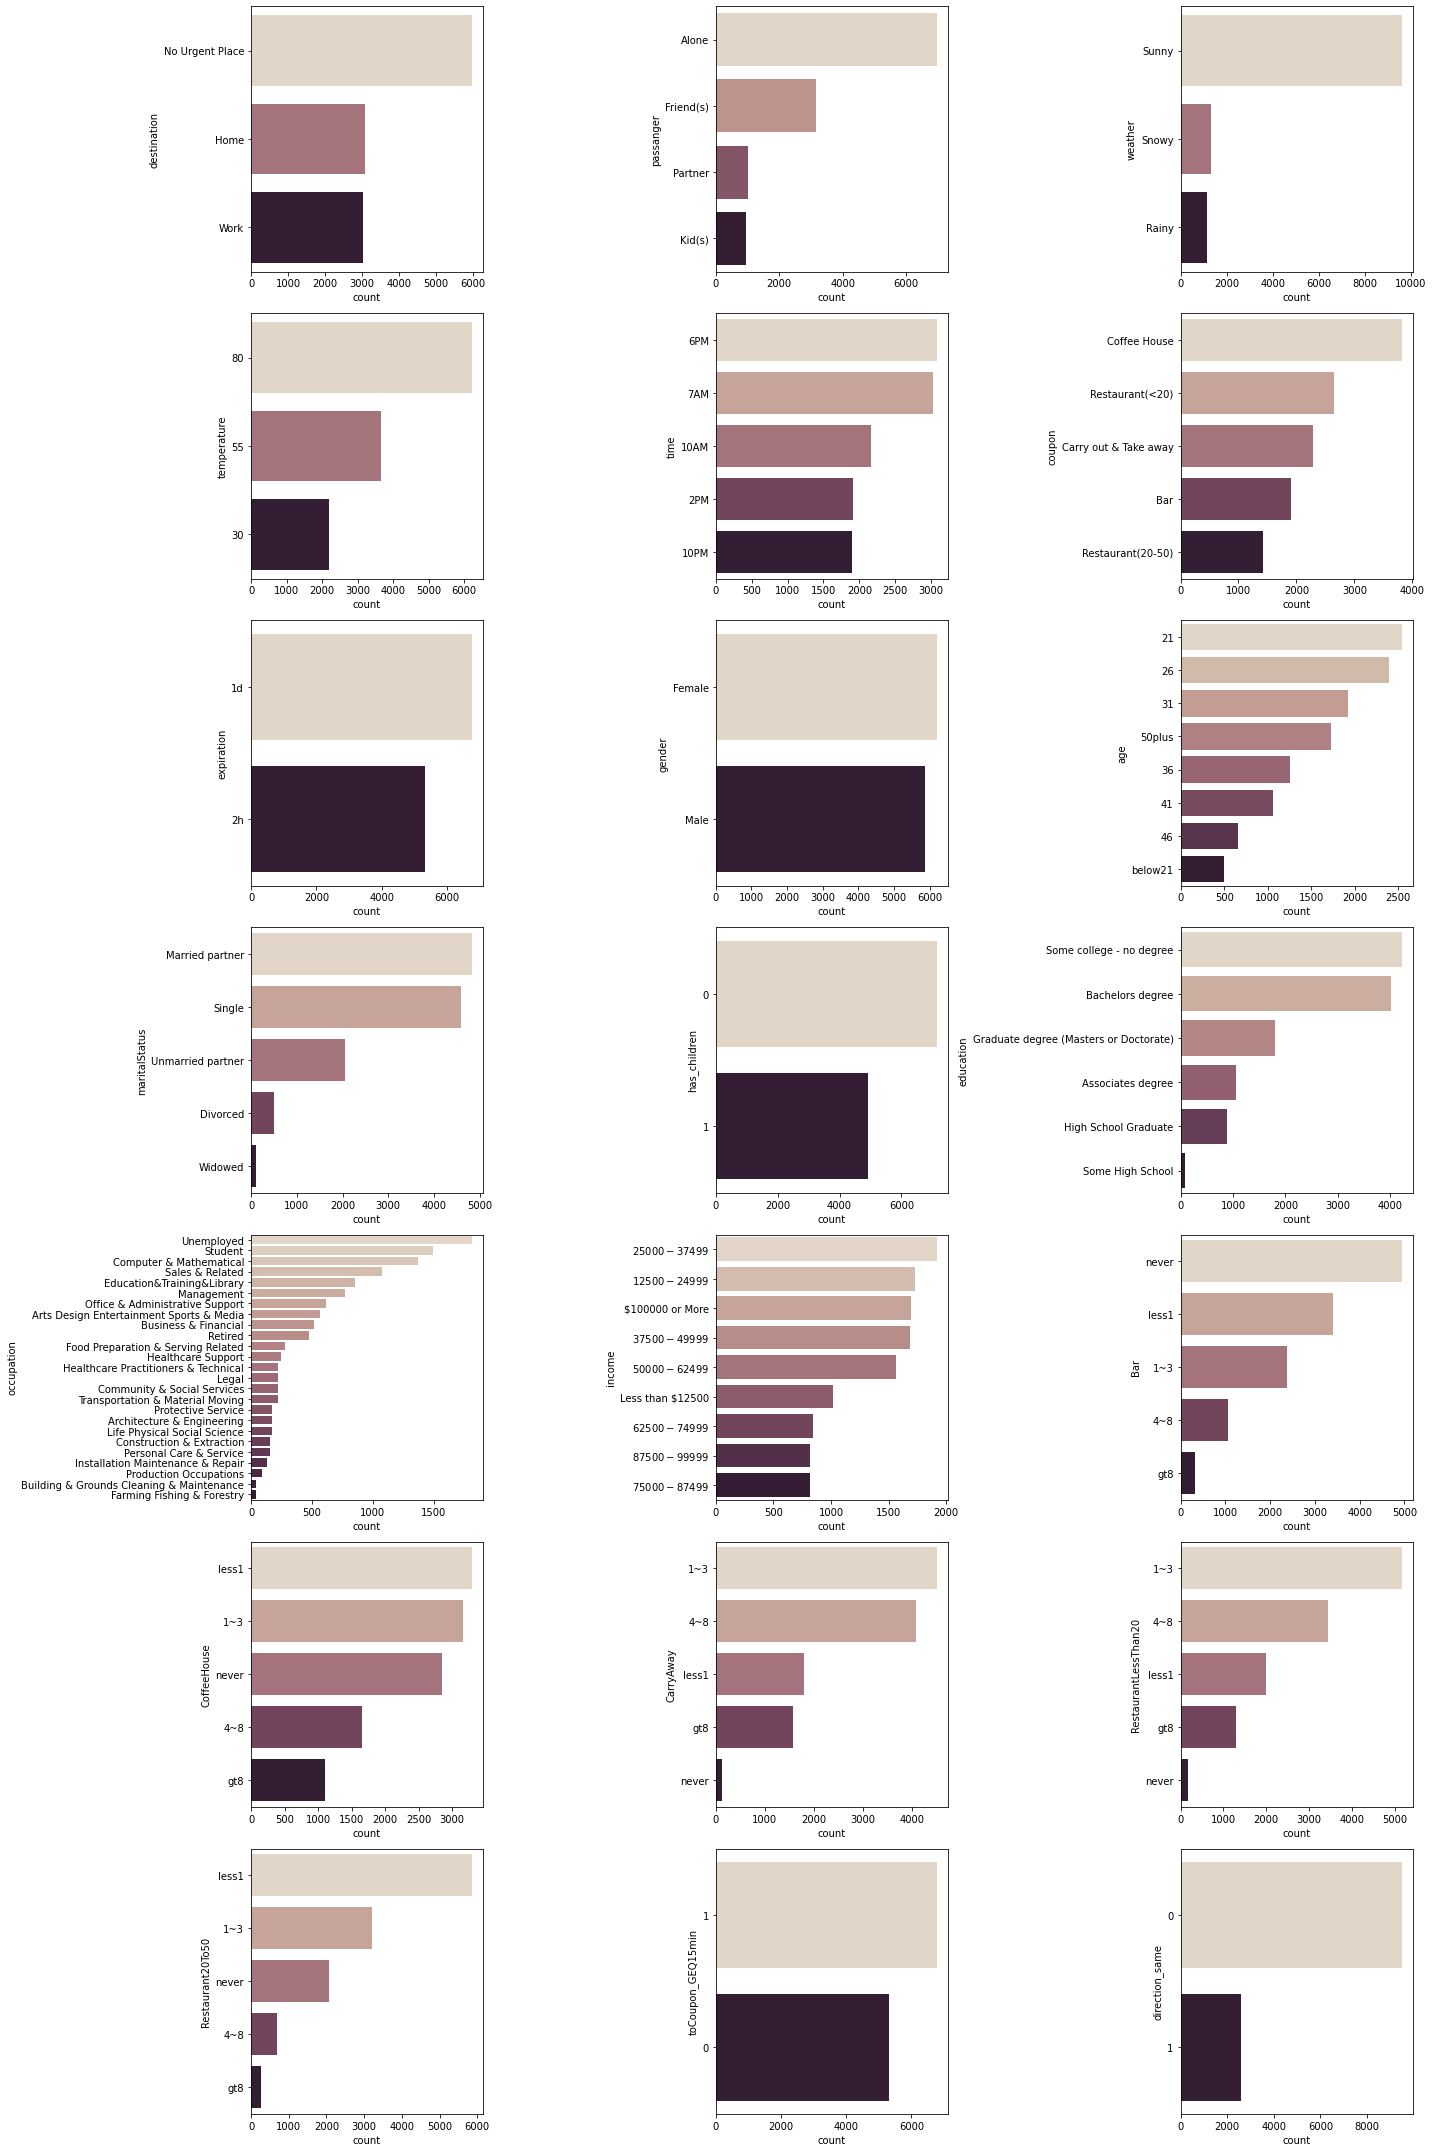

In [ ]:
fig, axes = plt.subplots(7, 3, figsize=(20,30))
axes = axes.flatten()
for ax, col in zip(axes, clean_df.columns):
    sns.countplot(y=col, data=clean_df, ax=ax, 
                  palette="ch:.25", order=clean_df[col].value_counts().index);
plt.tight_layout()
plt.show()

Corr on Numeric Data

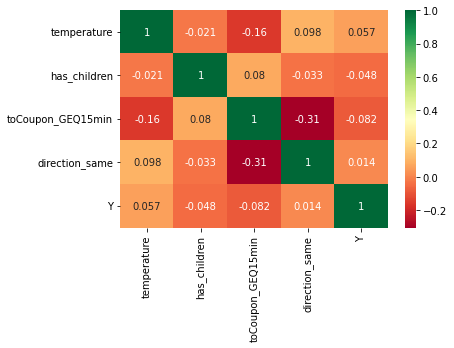

In [ ]:
sns.heatmap(clean_df.corr(), cmap='RdYlGn',annot=True)
plt.show()

Ordinary Data

In [ ]:
frequency_map = {
    'never': 0,
    'less1': 1,
    '1~3': 2,
    '4~8': 3,
    'gt8': 4
}
age_map = {
    'below21': 0,
    '21': 1,
    '26': 2,
    '31': 3,
    '36': 4,
    '41': 5,
    '46': 6,
    '50plus': 7
}
income_map = {
    'Less than $12500': 0,
    '$12500 - $24999': 1,
    '$25000 - $37499': 2,
    '$37500 - $49999': 3,
    '$50000 - $62499': 4,
    '$62500 - $74999': 5,
    '$75000 - $87499': 6,
    '$87500 - $99999': 7,
    '$100000 or More': 8
}

In [ ]:
frequency_cols = ['Restaurant20To50', 'RestaurantLessThan20', 
                  'CarryAway', 'CoffeeHouse', 'Bar']

In [ ]:
for col in frequency_cols:
    clean_df[col] = clean_df[col].map(frequency_map)
clean_df.age = clean_df.age.map(age_map)
clean_df.income = clean_df.income.map(income_map)

Num --> Str

In [ ]:
clean_df.has_children = clean_df.has_children.astype(str)
clean_df.direction_same = clean_df.direction_same.astype(str)

In [ ]:
num_features_a = clean_df.select_dtypes(['int64', 'float64']).columns
cat_features_a = clean_df.select_dtypes(['object']).columns

In [ ]:
num_features_a = clean_df.select_dtypes(['int64', 'float64']).columns
cat_features_a = clean_df.select_dtypes(['object']).columns
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])
cat_transformer = OneHotEncoder()
preprocessor_a = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features_a),
    ('cat', cat_transformer, cat_features_a)
])
#X_train_a = preprocessor_a.fit_transform(X_train_a)
#X_test_a = preprocessor_a.transform(X_test_a)

In [ ]:
clean_df.to_csv('clean_df.csv', index=False)

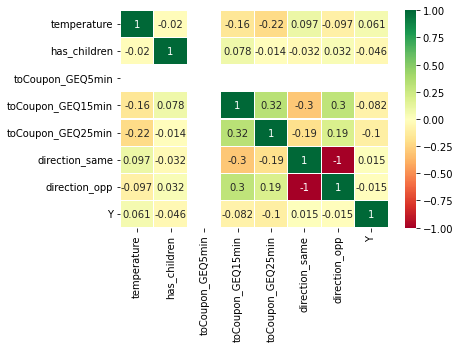

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
plt.show()

In [ ]:

x_raw = df2.drop(columns="Y")
scaler = StandardScaler().fit(x_raw)
x_raw = scaler.transform(x_raw)

y_raw = df2['Y']
X_train,X_test,y_train,y_test=train_test_split(x_raw,y_raw,test_size=0.3,random_state=88)


In [ ]:
#models = pd.DataFrame(columns=["Model","Accuracy Score"])

In [ ]:
'''
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predictions = log_reg.predict(X_test)
score = accuracy_score(y_test, predictions)
print("LogisticRegression: ", score)

new_row = {"Model": "LogisticRegression", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)
'''

'\nlog_reg = LogisticRegression()\nlog_reg.fit(X_train, y_train)\npredictions = log_reg.predict(X_test)\nscore = accuracy_score(y_test, predictions)\nprint("LogisticRegression: ", score)\n\nnew_row = {"Model": "LogisticRegression", "Accuracy Score": score}\nmodels = models.append(new_row, ignore_index=True)\n'

In [ ]:
model_pipeline = []
model_pipeline.append(LogisticRegression())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(SVC())
model_pipeline.append(MLPClassifier())
model_pipeline.append(GaussianNB())
model_list = ['Log Reg','KNN','Desision Tree','Random Forrest','SVC','NN','GNB']
acc_list = []
auc_list = []
cm_list = []
f1_list = []
for model in model_pipeline:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test,y_pred))
    fpr,tpr,_tresholds = metrics.roc_curve(y_test,y_pred)
    auc_list.append(round(metrics.auc(fpr,tpr),2))
    cm_list.append(confusion_matrix(y_test,y_pred))
    f1_list.append(f1_score(y_test, y_pred, average='weighted'))
result_df = pd.DataFrame({'Model':model_list,'Accuracy':acc_list,'AUC':auc_list,'F1':f1_list})
result_df

In [ ]:
tf.random.set_seed(1)
initializer = tf.keras.initializers.GlorotNormal(seed=9999)
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape = x_test.shape[1],))  #input
model.add(tf.keras.layers.Dense(512, activation = "sigmoid", name = "hidden1", kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(256, activation = "sigmoid", name = "hidden2", kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(128, activation = "sigmoid", name = "hidden3", kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(64, activation = "sigmoid", name = "hidden4", kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(32, activation = "sigmoid", name = "hidden5", kernel_initializer=initializer))
model.add(tf.keras.layers.Dropout(0.3))


#Output layer
model.add(tf.keras.layers.Dense(1,activation = "sigmoid", name = "output"))
model.summary()

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ['acc',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
print(model.layers[2].get_weights()[0][0])

In [ ]:
model.layers[2].get_weights()[0].shape

In [ ]:
checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.4f}_acc{val_acc: .4f}.hdf5"
model_check_point_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_filepath,
                                                                save_weight_only = True,
                                                                monitor = "val_acc",
                                                                mode = "max",
                                                                save_best_only = True,
                                                                verbose=1)

In [ ]:
history = model.fit(x_train, y_train, batch_size= 32, epochs = 100, verbose = 2, validation_split= 0.2, callbacks=[model_check_point_callback])

In [ ]:
#model.load_weights('bestmodel_epoch85_valloss0.3756_acc 0.8458.hdf5')
model.load_weights('bestmodel_epoch70_valloss0.3445_acc 0.8516.hdf5') #มี Dropout

y_pred = model.predict(x_test)
y_pred = np.round(y_pred)
y_pred = np.nan_to_num(y_pred)

score = accuracy_score(y_test, y_pred)
recall_precision_f1 = precision_recall_fscore_support(y_test,y_pred, average = "macro")

print(f'Test Accuracy Score :{score}')
print(f'Recall :{recall_precision_f1[0]}')
print(f'Precision :{recall_precision_f1[1]}')
print(f'F1 :{recall_precision_f1[2]}')

In [ ]:
print(y_pred)

In [ ]:
# Summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for Recall
plt.figure(figsize=(15,5))
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for Precision
plt.figure(figsize=(15,5))
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()